In [ ]:
# split the data to train and test
import os
import random
import shutil
import csv
import numpy as np
def CopyFile(imageDir,test_rate,save_test_dir,save_train_dir):#三个参数，第一个为每个类别的所有图像在计算机中的位置
    #第二个为copy的图片数目所占总的比例，最后一个为移动的图片保存的位置，
    image_number = len(imageDir)  #图片总数目
    test_number = int(image_number * test_rate)#要移动的图片数目
    print("要移动到%s目录下的图片数目为:%d"%(save_test_dir,test_number))
    test_samples = random.sample(imageDir, test_number)#随机截取列表imageDir中数目为test_number的元素
 # copy图像到目标文件夹
    if not os.path.exists(save_test_dir):
        os.makedirs(save_test_dir)
        print("save_test_dir has been created successfully!")
    else:
        print("save_test_dir already exited!")
    if not os.path.exists(save_train_dir):
        os.makedirs(save_train_dir)
        print("save_train_dir has been created successfully!")
    else:
        print("save_train_dir already exited!")
    for i,j in enumerate(test_samples):
        shutil.copy(test_samples[i], save_test_dir+test_samples[i].split("/")[-1])
    print("test移动完成！")
    for train_imgs in imageDir:
        if train_imgs not in test_samples:
            shutil.copy(train_imgs, save_train_dir+train_imgs.split("/")[-1])
    print("train移动完成")
#只需给定file_path、test_rate即可完成整个任务
#原始路径+分割比例
################################
file_path="C:/非系统/dogs-vs-cats/train/train"
test_rate = 0.75
################################
file_dirs=os.listdir(file_path)
origion_paths=[]
save_test_dirs=[]
save_train_dirs=[]
for path in file_dirs:
   origion_paths.append(file_path+"/"+path+"/")
   save_train_dirs.append("./train/"+path+"/")
   save_test_dirs.append("./test/"+path+"/")
for i,origion_path in enumerate(origion_paths):
    image_list = os.listdir(origion_path) #获得原始路径下的所有图片的name（默认路径下都是图片）
    image_Dir=[]
    for x,y in enumerate(image_list):
        image_Dir.append (os.path.join(origion_path, y))
    print("%s目录下共有%d张图片！"%(origion_path,len(image_Dir)))
    CopyFile(image_Dir,test_rate,save_test_dirs[i],save_train_dirs[i])
print("all datas has been moved successfully!")


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
# imagedatagenerator 可以平移旋转放大缩小增减亮，用一张图片生成不同的图片来更好的训练模型
train_data = train_datagen.flow_from_directory('./test',target_size=(50,50),batch_size = 32,class_mode = 'binary')
test_data = train_datagen.flow_from_directory('./train',target_size=(50,50),batch_size = 32,class_mode = 'binary')
# batch 是一批数据的大小
#注意地址必须是包含图片的类别文件夹的目录

Found 12500 images belonging to 2 classes.
Found 12500 images belonging to 2 classes.


In [6]:
# set up the cnn model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
model = Sequential()
#卷积层
model.add(Conv2D(32,(3,3),input_shape=(50,50,3),activation = 'relu'))
#池化层
model.add(MaxPool2D(pool_size = (2,2)))
#卷积层
model.add(Conv2D(32,(3,3),activation = 'relu'))
#池化层
model.add(MaxPool2D(pool_size = (2,2)))
#展开层
model.add(Flatten())
#全连接层
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [7]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               495744    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [44]:
#train the model
model.fit_generator(train_data,epochs = 10)
#因为是从ImagedataGenerator生成的，所以不是fit

Epoch 1/10
391/391 [==============================] - 103s 264ms/step - loss: 0.0854 - accuracy: 0.9723
Epoch 2/10
391/391 [==============================] - 29s 74ms/step - loss: 0.0555 - accuracy: 0.9841
Epoch 3/10
391/391 [==============================] - 30s 76ms/step - loss: 0.0414 - accuracy: 0.9887
Epoch 4/10
391/391 [==============================] - 29s 75ms/step - loss: 0.0285 - accuracy: 0.9929
Epoch 5/10
391/391 [==============================] - 29s 75ms/step - loss: 0.0316 - accuracy: 0.9907
Epoch 6/10
391/391 [==============================] - 29s 74ms/step - loss: 0.0203 - accuracy: 0.9942
Epoch 7/10
391/391 [==============================] - 29s 75ms/step - loss: 0.0303 - accuracy: 0.9903
Epoch 8/10
391/391 [==============================] - 29s 75ms/step - loss: 0.0213 - accuracy: 0.9933
Epoch 9/10
391/391 [==============================] - 29s 74ms/step - loss: 0.0085 - accuracy: 0.9983
Epoch 10/10
391/391 [==============================] - 29s 75ms/step - loss: 0.0

In [45]:
accuracy_test = model.evaluate(test_data)
print(accuracy_test)
# 由于文件夹的字母表排列，cat排在dog前面，因此0是cat，1是dog，或者使用命令获知


391/391 [==============================] - 45s 114ms/step - loss: 1.1840 - accuracy: 0.7657
[1.183998942375183, 0.7656800150871277]


In [46]:
print(train_data.class_indices)  #注意class_indices是flow_from_directory的属性

{'cat': 0, 'dog': 1}


[[1]]
[[0]]
[[0]]
[[1]]
[[1]]
[[1]]
[[0]]
[[1]]
[[0]]
[[0]]


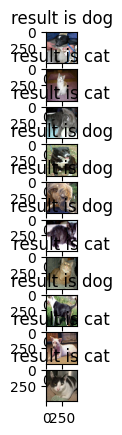

In [50]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpi

def preprocessing(img_path):
    pic_target = img_path
    pic_target = load_img(pic_target,target_size =(50,50))
    pic_target = img_to_array(pic_target)
    pic_target = pic_target / 255
    pic_target = pic_target.reshape(1,50,50,3)
    return pic_target

file_path = 'C:/非系统/dogs-vs-cats/test1/test1/'
file_dirs = os.listdir(file_path)
pic_dirs = []
for path in file_dirs:
    pic_dirs.append(file_path + path )
    
counter = 1
for i,pic_dir in enumerate(pic_dirs):
    if(counter > 10): 
        break
    result = model.predict_classes(preprocessing(pic_dir))
    img_ori = load_img(pic_dir, target_size = (500,500))
    plt.subplot(10,1,counter)
    plt.imshow(img_ori)
    plt.title('result is dog' if result == 1 else 'result is cat')
    print(result)
    counter=counter+1
    

In [89]:
#加载test1的所有图片
from tensorflow.keras.preprocessing.image import load_img, img_to_array
pic_dog = 'C:/非系统/dogs-vs-cats/test1/test1/885.jpg'
pic_dog = load_img(pic_dog,target_size = (50,50))
pic_dog = img_to_array(pic_dog)
pic_dog = pic_dog / 255
pic_dog = pic_dog.reshape(1,50,50,3)
result = model.predict_classes(pic_dog)
print(result)

[[1]]


1. 高光错误
2. 有很多人的干扰 - 错误
3. 遮挡 - 错误
4. 穿衣戴帽 - 错误
5. 简笔画 - 错误


To be completed
1. 将train 分割成train 和 test
2. 将test里的图片自动多张导入，生成图片显示和预测结果显示